In [96]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt
import mplfinance as mpf

import time

import os
from os import listdir
from os.path import isfile, join

In [126]:
#Some Defatult Values
PATH = "C:/Users/dietd/Untitled Folder/Python for Finance/Financial Data/Stock Data/"
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR,S_MONTH, S_DAY)

E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR,E_MONTH, E_DAY)


In [131]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

['A',
 'AA',
 'AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'ABBV',
 'ABC',
 'ABCB',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'AC',
 'ACA',
 'ACAD',
 'ACCO',
 'ACER',
 'ACGL',
 'ACHC',
 'ACHV',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACOR',
 'ACRE',
 'ACRS',
 'ACRX',
 'ACTG',
 'ACU',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADM',
 'ADMA',
 'ADMP',
 'ADNT',
 'ADP',
 'ADSK',
 'ADT',
 'ADTN',
 'ADUS',
 'ADVM',
 'ADXS',
 'AE',
 'AEE',
 'AEHR',
 'AEIS',
 'AEL',
 'AEMD',
 'AEO',
 'AEP',
 'AES',
 'AEY',
 'AFG',
 'AFL',
 'AGCO',
 'AGE',
 'AGEN',
 'AGIO',
 'AGLE',
 'AGM',
 'AGNC',
 'AGO',
 'AGR',
 'AGRX',
 'AGS',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AIG',
 'AIN',
 'AINC',
 'AIR',
 'AIRG',
 'AIRI',
 'AIRT',
 'AIT',
 'AIV',
 'AIZ',
 'AJG',
 'AJRD',
 'AJX',
 'AKAM',
 'AKBA',
 'AKR',
 'AKTS',
 'AL',
 'ALB',
 'ALCO',
 'ALDX',
 'ALE',
 'ALEX',
 'ALG',
 'ALGN',
 'ALGT',
 'ALJJ',
 'ALK',
 'ALKS',
 'ALL',
 'ALLE',
 'ALLK',
 'ALLO',
 'ALLY',
 'ALNY',
 'ALOT',
 'ALP

In [132]:
#function that creates df from csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH+ticker+'.csv')
    except FileNotFoundError:
        print('File Does Not Exist')
    else:
        return df

In [133]:
#function that saves df to csv
def save_df_to_csv(df, ticker):
    df.to_csv(PATH+ticker+'.csv')

In [134]:
#Return valid dates in dataframe
def get_valid_dates(df, sdate, edate):
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate)
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()

        date_leading = '-'.join(('0' if len(x) < 2 else '') + x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x) < 2 else '') + x for x in last_date.split('-'))

    except Exception:
        print("Date is Corrupted")

    else:
        return date_leading, date_ending

In [135]:
#Provide ROI between two dates
def roi_between_dates(df, sdate, edate):
    try:
        start_val = df.loc[sdate, 'Adj Close']
        end_val = df.loc[edate, 'Adj Close']
        roi = ((end_val-start_val)/start_val)

    except Exception:
        print("Data Corrupted")

    else:
        return roi

In [136]:
#get mean, sd, cov
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]['Adj Close'].mean()

def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]['Adj Close'].std()

def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean

In [137]:
#Test the functions
print(tickers[0])
stock_a = get_df_from_csv(tickers[0])

print(get_valid_dates(stock_a, '2020-01-01', '2020-12-31'))
sdate, edate = get_valid_dates(stock_a, '2020-01-01', '2020-12-31')
print("Adj Close Mean: ", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close SD: ", get_sd_between_dates(stock_a, sdate, edate))
print("Adj Close COV: ", get_cov_between_dates(stock_a, sdate, edate))
stock_a = stock_a.set_index(['Date'])
print("Return on Investment: ", roi_between_dates(stock_a, sdate, edate))


A
('2020-01-02', '2020-12-31')
Adj Close Mean:  90.72608257475353
Adj Close SD:  13.636768724434512
Adj Close COV:  0.15030703781570784
Return on Investment:  0.38750008065806807


In [138]:
def get_cov_ror(tickers, sdate, edate):
    col_names = ["Ticker", "COV", "ROI"]
    df = pd.DataFrame(columns=col_names)
    for ticker in tickers:
        print("Working on: ", ticker)
        s_df = get_df_from_csv(ticker)
        dates_period = get_valid_dates(s_df, sdate, edate)
        #print(dates_period)
        start_date, end_date = dates_period
        cov = get_cov_between_dates(s_df, start_date, end_date)
        s_df = s_df.set_index(['Date'])
        roi = roi_between_dates(s_df, start_date, end_date)
        df.loc[len(df.index)] = [ticker, cov, roi]

    return df

In [139]:
market_df = get_cov_ror(tickers, '2019-01-01', '2019-12-31')

Working on:  A
Working on:  AA
Working on:  AAL
Working on:  AAME
Working on:  AAOI
Working on:  AAON
Working on:  AAP
Working on:  AAPL
Working on:  AAT
Working on:  ABBV
Working on:  ABC
Working on:  ABCB
Working on:  ABEO
Working on:  ABG
Working on:  ABIO
Working on:  ABM
Working on:  ABMD
Working on:  ABR
Working on:  ABT
Working on:  AC
Working on:  ACA
Working on:  ACAD
Working on:  ACCO
Working on:  ACER
Working on:  ACGL
Working on:  ACHC
Working on:  ACHV
Working on:  ACIW
Working on:  ACLS
Working on:  ACM
Working on:  ACMR
Working on:  ACN
Working on:  ACNB
Working on:  ACOR
Working on:  ACRE
Working on:  ACRS
Working on:  ACRX
Working on:  ACTG
Working on:  ACU
Working on:  ADBE
Working on:  ADC
Working on:  ADES
Working on:  ADI
Working on:  ADM
Working on:  ADMA
Working on:  ADMP
Working on:  ADNT
Working on:  ADP
Working on:  ADSK
Working on:  ADT
Working on:  ADTN
Working on:  ADUS
Working on:  ADVM
Working on:  ADXS
Working on:  AE
Working on:  AEE
Working on:  AEHR
W

In [140]:
display(market_df)

,Ticker,COV,ROI
0,A,0.065270,0.309761
1,AA,0.158993,-0.180259
2,AAL,0.094255,-0.106021
3,AAME,0.123107,-0.202506
4,AAOI,0.202465,-0.251889
...,...,...,...
2669,ZTS,0.129821,0.576627
2670,ZUMZ,0.146251,0.760448
2671,ZUO,0.193583,-0.212637
2672,ZYNE,0.376312,0.623656


In [141]:
#20 best performing stocks
market_df.sort_values(by=['ROI'], ascending=False).head(20)

,Ticker,COV,ROI
275,AXSM,0.745206,37.567163
1352,KOD,0.974172,8.802452
843,EVER,0.578598,6.500000
731,DRRX,0.566453,6.037037
459,CDLX,0.479753,4.788214
1496,MBOT,0.290907,4.438503
799,ENPH,0.447633,4.310975
1756,OESX,0.402282,4.000000
212,ARWR,0.496426,3.834604
2590,WKHS,0.526715,3.676923


In [157]:
#merge multiple stock in one df by column name
def merge_df_by_column_name(col_name, sdate, edate, *tick_args):
    mult_df = pd.DataFrame()
    #print(tick_args[0])
    for x in tick_args:
        #print(x)
        df = get_df_from_csv(x)
        df['Date']=pd.to_datetime(df['Date'])
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
    
    return mult_df
        

In [158]:
#Create correlation matrix for the stocks
#We focus on correlations between returns
#We focus on FAANG stocks

faang_list = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
mult_df = merge_df_by_column_name('Daily_Return', '2020-1-1', '2020-12-31', *faang_list)
mult_df

,META,AMZN,AAPL,NFLX,GOOG
754,0.022071,0.027151,0.022816,0.019285,0.022700
755,-0.005291,-0.012139,-0.009722,-0.011855,-0.004907
756,0.018834,0.014886,0.007968,0.030469,0.024657
757,0.002164,0.002092,-0.004703,-0.015127,-0.000624
758,0.010138,-0.007809,0.016086,0.025729,0.007880
...,...,...,...,...,...
1002,-0.002648,-0.003949,0.007712,-0.000991,0.003735
1003,0.035901,0.035071,0.035766,0.010020,0.021416
1004,-0.000794,0.011584,-0.013315,0.022634,-0.009780
1005,-0.017740,-0.010882,-0.008527,-0.011830,-0.010917


,META,AMZN,AAPL,NFLX,GOOG
META,1.000000,0.682311,0.767595,0.574579,0.803420
AMZN,0.682311,1.000000,0.697914,0.678709,0.680991
AAPL,0.767595,0.697914,1.000000,0.558986,0.752442
NFLX,0.574579,0.678709,0.558986,1.000000,0.529436
GOOG,0.803420,0.680991,0.752442,0.529436,1.000000


<Axes: >

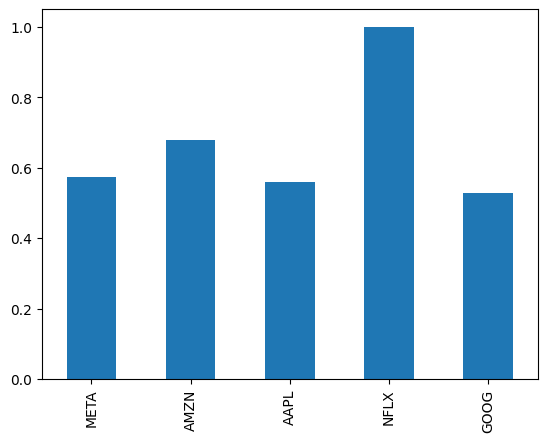

In [159]:
corr_matrix = mult_df.corr()
display(corr_matrix)
corr_matrix['NFLX'].plot(kind='bar')

In [168]:
all_stocks_df = merge_df_by_column_name("Daily_Return", '2020-1-1', '2020-12-31', *tickers)
all_stocks_corr = all_stocks_df.corr()
display(all_stocks_corr)

C:\Users\dietd\AppData\Local\Temp\ipykernel_2224\3372025810.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mult_df[x] = df.loc[mask][col_name]
C:\Users\dietd\AppData\Local\Temp\ipykernel_2224\3372025810.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mult_df[x] = df.loc[mask][col_name]
C:\Users\dietd\AppData\Local\Temp\ipykernel_2224\3372025810.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

KeyError: 'Daily_Return'

In [151]:
#get variance
days = len(mult_df.index)
annualized_NFLX_var = mult_df['NFLX'].var() * days

print("Annualized NETFLIX variance: ", annualized_NFLX_var)

Annualized NETFLIX variance:  0.21435236996843451


In [153]:
#get covariance
cov_matrix = mult_df.cov() * days
display(cov_matrix)

,META,AMZN,AAPL,NFLX,GOOG
META,0.211498,0.121090,0.165004,0.122340,0.141870
AMZN,0.121090,0.148918,0.125888,0.121261,0.100904
AAPL,0.165004,0.125888,0.218483,0.120969,0.135044
NFLX,0.122340,0.121261,0.120969,0.214352,0.094118
GOOG,0.141870,0.100904,0.135044,0.094118,0.147431


In [166]:
#Calculate Portfolio variance
portfolio_list = ['META', 'NEM']
portfolio_df = merge_df_by_column_name('Daily_Return', '2020-1-1', '2020-12-31', *portfolio_list)
display(portfolio_df)

display(portfolio_df.corr())

price_df = merge_df_by_column_name("Adj Close", '2020-1-1', '2020-12-31', *portfolio_list)

display(price_df.head())

#1 META share and 5 NEM shares; equally weighted (approximately)
fb_weight = 209.78 / (209.78 + 5 * 38.57)
nem_weight = 5 * 38.57 / (209.78 + 5 * 38.57)

weigths = np.array([fb_weight, nem_weight])
portfolio_var = np.dot(weigths.T, np.dot(portfolio_df.cov() * days, weigths))

print("Portfolio Variance: ", portfolio_var)
print("META Variance: ", portfolio_df['META'].var() * 253)
print("NEM Variance: ", portfolio_df['NEM'].var() * 253)

,META,NEM
754,0.022071,-0.005294
755,-0.005291,-0.009024
756,0.018834,0.010040
757,0.002164,-0.000694
758,0.010138,-0.026602
...,...,...
1002,-0.002648,0.011709
1003,0.035901,-0.010913
1004,-0.000794,-0.001505
1005,-0.017740,0.011050


,META,NEM
META,1.000000,0.199835
NEM,0.199835,1.000000


,META,NEM
754,209.779999,38.572830
755,208.669998,38.224766
756,212.600006,38.608536
757,213.059998,38.581760
758,215.220001,37.555412


Portfolio Variance:  0.12754724507567675
META Variance:  0.21149771065707504
NEM Variance:  0.21334769342746054
